In [1]:
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adadelta
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils.visualize_util import model_to_dot, plot
from keras import backend as K
import numpy as np
from IPython.display import SVG

from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
plt.style.use("ggplot")
np.random.seed(13)

Using Theano backend.


In [2]:
batch_size = 256
nb_classes = 10
nb_epoch = 4
nb_filter = 10

img_rows, img_cols = 32, 32
img_channels = 3

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

X_train shape: (50000, 3, 32, 32)
50000 train samples
10000 test samples


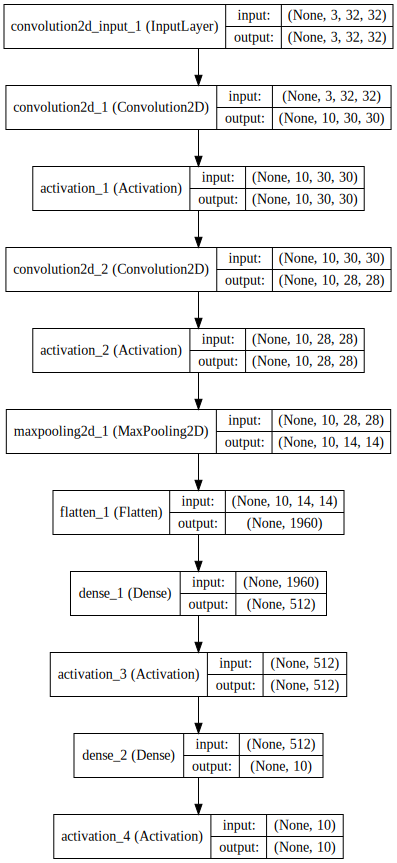

In [3]:
model = Sequential()
model.add(Convolution2D(nb_filter, 3, 3, input_shape=(img_channels, img_rows, img_cols)))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filter, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [4]:
res = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch, validation_data=(X_test, Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/4
50000/50000 [==============================] - 84s - loss: 1.8696 - acc: 0.3317 - val_loss: 1.6052 - val_acc: 0.4359
Epoch 2/4
50000/50000 [==============================] - 84s - loss: 1.3928 - acc: 0.5064 - val_loss: 1.3822 - val_acc: 0.5133
Epoch 3/4
50000/50000 [==============================] - 83s - loss: 1.2069 - acc: 0.5754 - val_loss: 1.2134 - val_acc: 0.5719
Epoch 4/4
50000/50000 [==============================] - 82s - loss: 1.0384 - acc: 0.6361 - val_loss: 1.2285 - val_acc: 0.5727


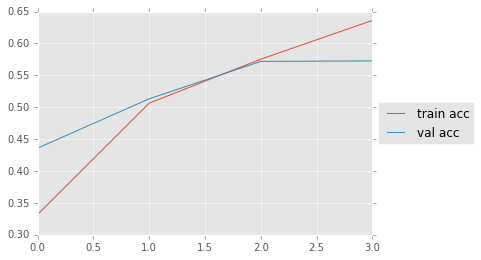

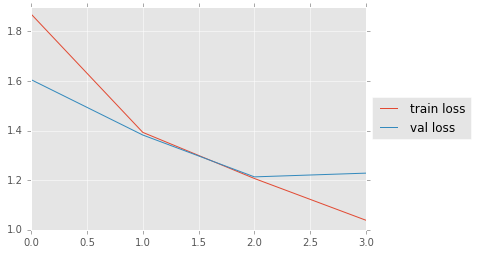

In [5]:
x = range(nb_epoch)
plt.plot(x, res.history['acc'], label="train acc")
plt.plot(x, res.history['val_acc'], label="val acc")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.plot(x, res.history['loss'], label="train loss")
plt.plot(x, res.history['val_loss'], label="val loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [6]:
def draw(data, row, col, n):
    plt.subplot(row, col, n)    
    plt.imshow(data)

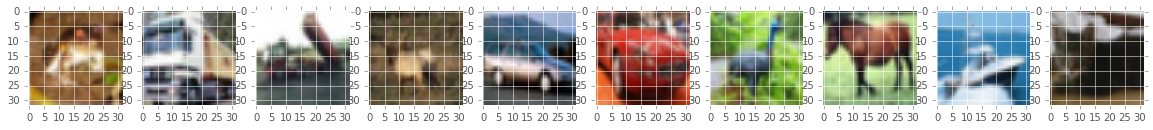

In [7]:
show_size = 10
plt.figure(figsize=(20,20))
for i in range(show_size):
    draw(X_train[i].reshape(3, 32, 32).transpose(1, 2, 0), 1, show_size, i+1)
plt.show()

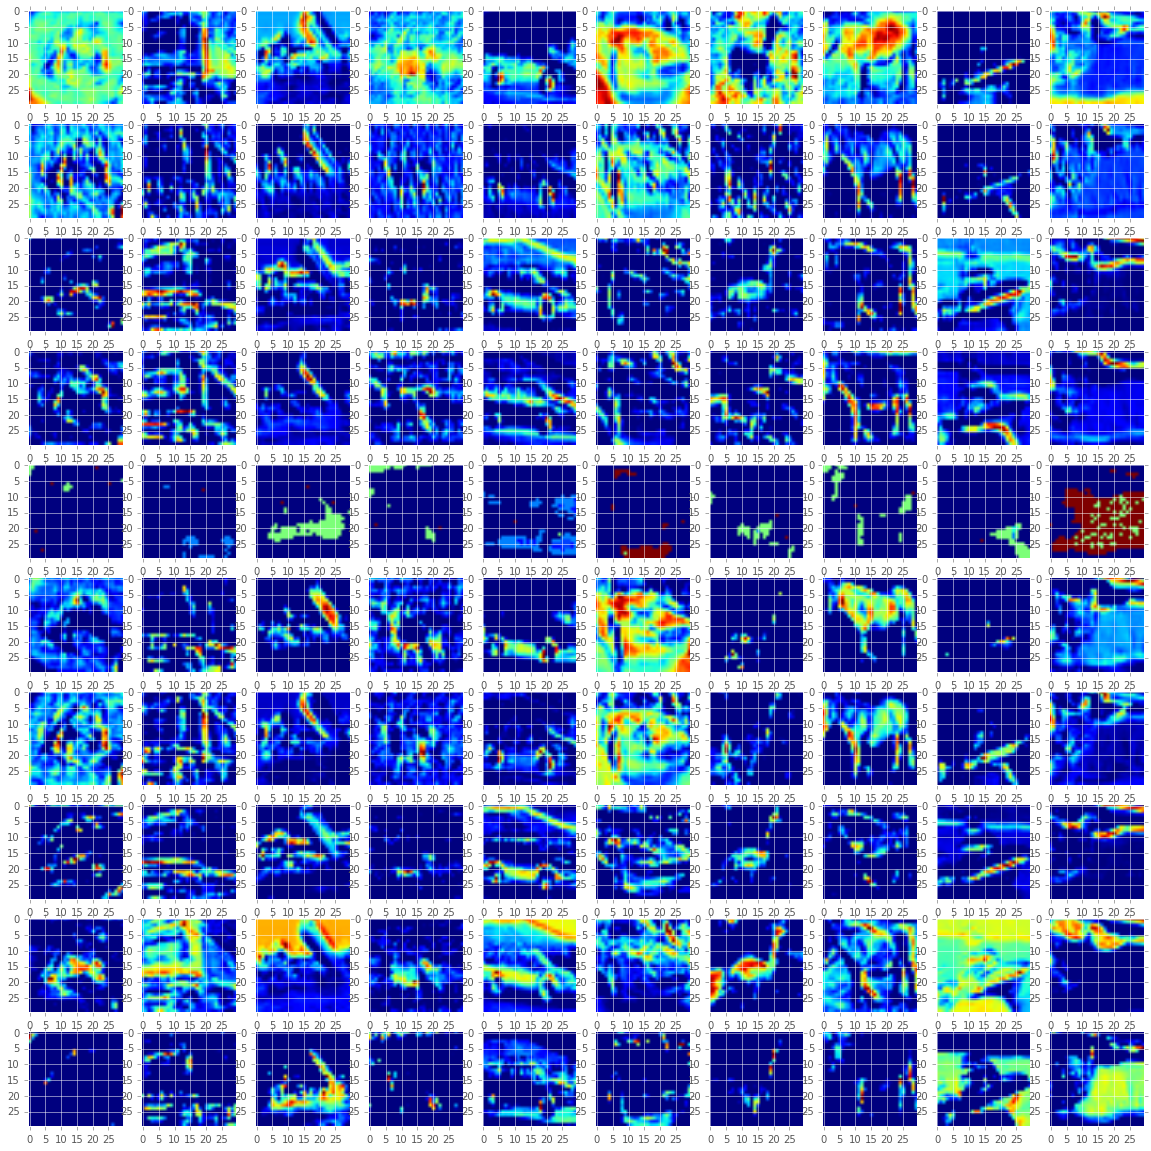

In [8]:
layer_output = K.function([model.layers[0].input],
                          [model.layers[1].output])
layers = layer_output([X_train[0:show_size]])[0]

plt.figure(figsize=(20,20))

for img_index, filters in enumerate(layers, start=1):
    for filter_index, mat in enumerate(filters):
        pos = (filter_index)*show_size+img_index
        draw(mat, nb_filter, show_size, pos)
plt.show()

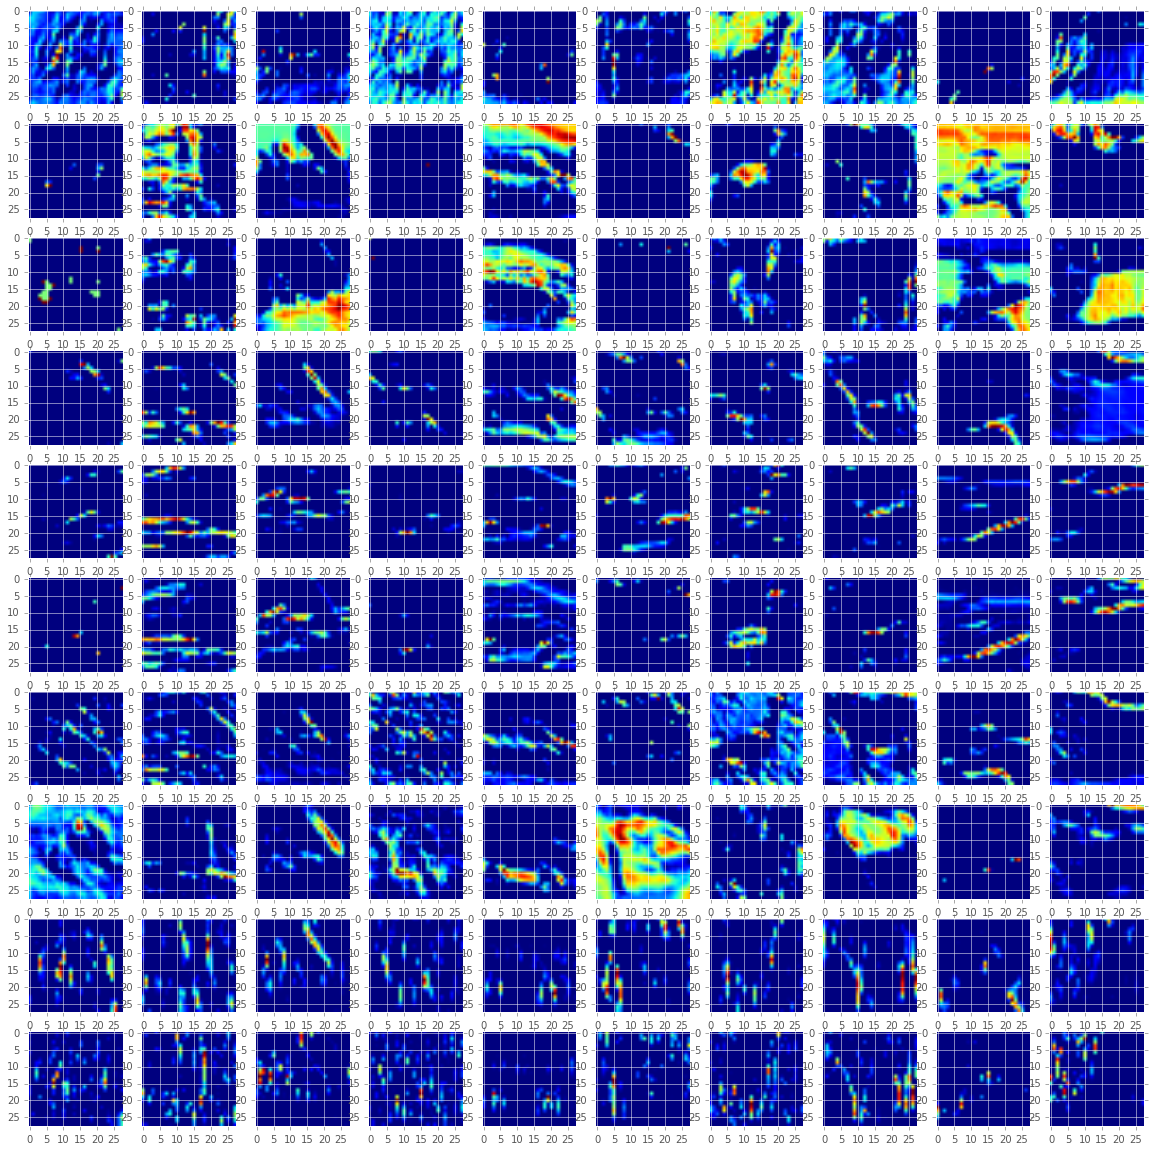

In [9]:
layer_output = K.function([model.layers[0].input],
                          [model.layers[3].output])
layers = layer_output([X_train[0:show_size]])[0]

plt.figure(figsize=(20,20))

for img_index, filters in enumerate(layers, start=1):
    for filter_index, mat in enumerate(filters):
        pos = (filter_index)*show_size+img_index
        draw(mat, nb_filter, show_size, pos)
plt.show()

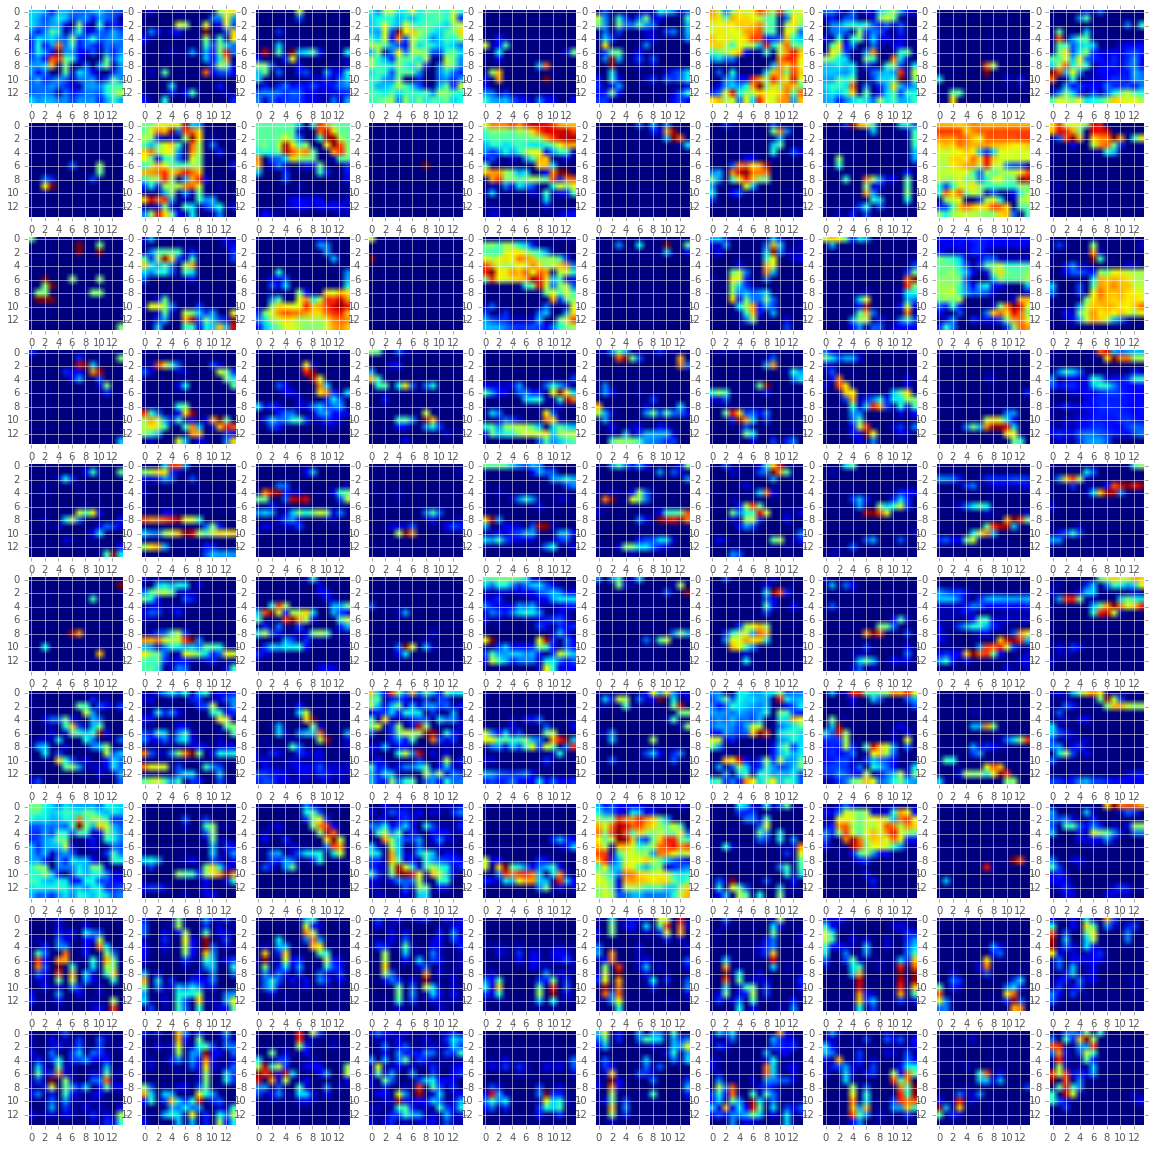

In [10]:
layer_output = K.function([model.layers[0].input],
                          [model.layers[4].output])
layers = layer_output([X_train[0:show_size]])[0]

plt.figure(figsize=(20,20))

for img_index, filters in enumerate(layers, start=1):
    for filter_index, mat in enumerate(filters):
        pos = (filter_index)*show_size+img_index
        mat_size = mat.shape[1]
        draw(mat, nb_filter, show_size, pos)
plt.show()